<h1>Basic structures to use when reading RH output</h1>

This notebook showcases how to read some useful output of a 1D RH run using Han's rhanalyze Python module. 

In [10]:
# some imports
import numpy as np
#import rhanalyze
import sys
sys.path.append('/Users/gcauzzi/Level2/WFA_June2021_workshop/RH/python/')


from rhanalyze.rhatmos import input_atmos
import matplotlib.pyplot as plt


In [11]:
# Path to an RH ouput directory. ".... rhf1d/run" is the default one but you can pick any other
 
rhoutput ='/Users/gcauzzi/Level2/WFA_June2021_workshop/RH/rhf1d/run'



<h1>Read RH output directory</h1>

In [15]:
# We are importing this again, just to be sure
import sys
sys.path.append('/Users/gcauzzi/Level2/WFA_June2021_workshop/RH/python/')


import numpy as np
import rhanalyze
from rhanalyze.rhatmos import input_atmos
import matplotlib.pyplot as plt



In [16]:
# Read all the contents of the output directory into the "falc" structure.
# Note that the directory contains BOTH input & output of the RH synthesis

# Of course, you can name this variable whatever you want. 
falc = rhanalyze.rhout(rhoutput) 

# See what's inside "falc" structure
print(dir(falc))



['Natom', 'Nray', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'atmos', 'atoms', 'geometry', 'inputs', 'opacity', 'rays', 'rhdir', 'spectrum']


<h1>Geometry</h1>

In [17]:
# Geometry
print('What is in falc.geometry?')
print()
print(dir(falc.geometry))
print()

height = falc.geometry.height            # height scale in m
tau500 = falc.geometry.tau500            # optical depth tau_500 scale
cmass = falc.geometry.cmass              # column mass in kg / m^3
                                         

print('RH output path:          ', falc.rhdir)
print('Number of rays:          ', falc.geometry.Nrays)
print('   Mu values:            ', falc.geometry.xmu)
print('Number of height points: ', falc.geometry.Ndep)
print('   Height of index 0:     '+ format(height[0],'4.2f') + ' m')
print('   Height of index -1:    '+ format(height[-1],'4.2f') + ' m')

What is in falc.geometry?

['Ndep', 'Nrays', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'cmass', 'filename', 'height', 'read', 'tau500', 'type', 'vz', 'wmu', 'xmu']

RH output path:           /Users/gcauzzi/Level2/WFA_June2021_workshop/RH/rhf1d/run
Number of rays:           5
   Mu values:             [0.04691008 0.23076534 0.5        0.76923466 0.95308992]
Number of height points:  82
   Height of index 0:     2157895.68 m
   Height of index -1:    -100031.50 m


Text(0, 0.5, 'Column mass (kg m$^{-3}$)')

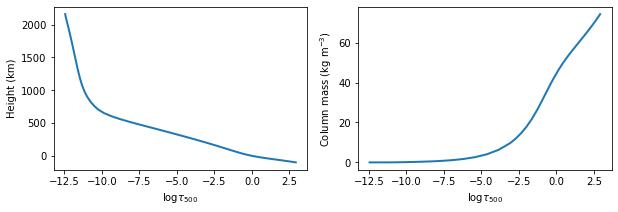

In [18]:
#Let's plot a couple of variables:

fig, ax = plt.subplots(1,2, figsize = (10, 3))
ax[0].plot(np.log(tau500), height/1000., linewidth=2.0) # height in km
ax[1].plot(np.log(tau500), cmass, linewidth=2.0)

ax[0].set_xlabel("$\\log \\tau_{500}$")
ax[0].set_ylabel("Height (km)")

ax[1].set_xlabel("$\\log \\tau_{500}$")
ax[1].set_ylabel("Column mass (kg m$^{-3}$)")



$\bf Note:$ 1. Larger geometrical heights correspond to smaller optical depths; 2. the lowest height in the model might be negative, i.e. below the surface as defined by $\tau_{500} = 0$; 3. Column mass increases with depth. These variables are part of the *input* atmosphere. 


<h1>Atmos</h1>

In [22]:
# Atmosphere
print('What is in falc.atmos?')
print()
print(dir(falc.atmos))
print()

print('Number of elements:                               falc.atmos.Nelem = ', falc.atmos.Nelem)
print('Number of Hydrogen levels:                        falc.atmos.NHydr = ', falc.atmos.NHydr)
print('Hydrogen densities for NHydr levels:              falc.atmos.nH')
print('    Hydrogen populations for ground level:        falc.atmos.nH[:,0]')
print('    Ionized Hydrogen populations:                 falc.atmos.nH[:,5]')
print('Stokes (true or false):                           falc.atmos.stokes = ', falc.atmos.stokes)
print('Temperature (Kelvin):                             falc.atmos.T')
print('Electron density (m^-3):                          falc.atmos.n_elec')
print('Magnetic field strength (Tesla):                  falc.atmos.B')
print('Magnetic field inclination (radians):             falc.atmos.gamma_B')
print('Magnetic field azimuth (radians):                 falc.atmos.chi_B')
print('Microturbulent velocity (m/s):                   falc.atmos.vturb')


What is in falc.atmos?

['B', 'ID', 'NHydr', 'Nelem', 'T', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'chi_B', 'elements', 'filename', 'gamma_B', 'moving', 'nH', 'n_elec', 'read', 'stokes', 'vturb']

Number of elements:                               falc.atmos.Nelem =  99
Number of Hydrogen levels:                        falc.atmos.NHydr =  6
Hydrogen densities for NHydr levels:              falc.atmos.nH
    Hydrogen populations for ground level:        falc.atmos.nH[:,0]
    Ionized Hydrogen populations:                 falc.atmos.nH[:,5]
Stokes (true or false):                           falc.atmos.stokes =  True
Temperature (Kelvin):                             falc.atmos.T
Electron dens

Text(0, 0.5, 'B (Gauss)')

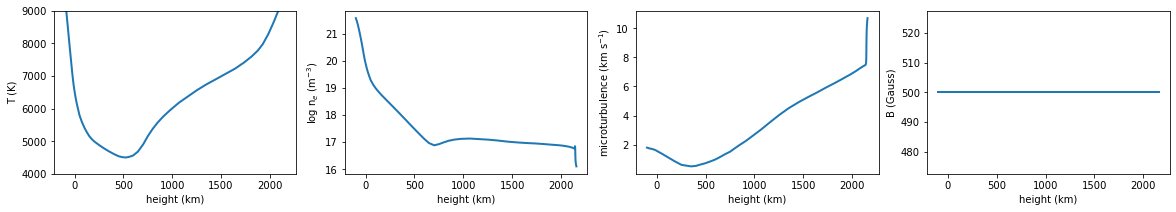

In [23]:
#Again, let's plot some variables 

fig, ax = plt.subplots(1,4, figsize = (20, 3))
ax[0].plot( height/1000.,falc.atmos.T, linewidth=2.0)
ax[1].plot(height/1000.,np.log10(falc.atmos.n_elec), linewidth=2.0)
ax[2].plot(height/1000.,falc.atmos.vturb/1000., linewidth=2.0)# km/s
ax[3].plot(height/1000.,falc.atmos.B*10000., linewidth=2.0)# in Gauss

for jj in range(4):
    ax[jj].set_xlabel('height (km)')

ax[0].set_ylim(4000, 9000)
ax[0].set_ylabel('T (K)')
ax[1].set_ylabel('log n$_e$ (m$^{-3}$)')
ax[2].set_ylabel('microturbulence (km s$^{-1}$)')
ax[3].set_ylabel('B (Gauss)')

$\bf Note :$ 1. Height runs now left to right; 2. The temperature plot has the classical rise above ~500 km; 3. electron density stays ~ constant in the chromosphere (even if total density decreases by orders of magnitude!); 4. Microturbulence increases with height; 5. In this model we used, the magnetic field is constant throughout the whole atmosphere, at 500 G. 

<h1>Spectrum</h1>

In [24]:
# Finally, we look at the resulting spectrum. In this test run, only the CaII lines were calculated (resonance H&K, 
# and infrared triplet), while during the workshop we'll work also with Hydrogen and Sodium lines. 

# The number of wavelength points for this default case is 291 
# Let's look at them:

waves=falc.spectrum.waves

print('waves=', waves)




waves= [ 30.          35.          40.          45.          50.
  55.          60.          65.          70.          75.
  80.          85.          90.          95.         100.
 104.39996797 105.         110.         115.         120.
 121.7        121.75036111 121.8        121.84038933 125.
 130.         135.         140.         141.65517843 142.1
 142.10385035 387.46161971 389.15282298 390.35740468 390.88988747
 391.21552375 391.82696991 392.26279098 392.57357128 392.59605374
 392.7953256  392.95369559 393.06693749 393.14804929 393.20628523
 393.24823413 393.27858704 393.3006839  393.31690265 393.32893633
 393.33799033 393.34492289 393.35034502 393.35469178 393.35827288
 393.36130886 393.36395673 393.36632827 393.36869981 393.37134768
 393.37438366 393.37796476 393.38231152 393.38773365 393.39466621
 393.40372021 393.41575389 393.43197264 393.4540695  393.48442241
 393.52637131 393.58460725 393.66571904 393.77896093 393.81129303
 393.93733091 394.15908521 394.46986546 394.677004

Text(0, 0.5, 'Wavelength (nm)')

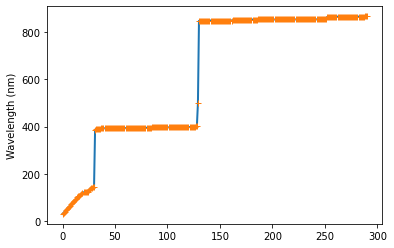

In [25]:
# A plot might be better ...

fig, figsize = (9,5)
plt.plot(waves,linewidth=2.0)
plt.plot(waves,'+',linewidth=10)
plt.ylabel("Wavelength (nm)")

$\bf Note:$ In this case, the wavelength points are not regularly distributed throughout the spectrum, but are clustered around the lines of interest (CaII H & K at ~ 400 nm; and CaII triplet at ~ 850 nm). 

<h1>Rays</h1>

In [26]:
# Finally, the resulting spectrum. The units are intensity, i.e. J / s/ m^2 / sr/ Hz


print('What is in falc.rays[0]:')
print(dir(falc.rays[0]))
print()
print('falc.rays contains the Stokes parameters for the observing geometry specified in ray.input.')
print('ray.input is a configuration file of RH where you request the formal')
print('solution to the RTE for an observing geometry of interest. This is often mu=1.0, i.e. disk center')
print()
print('mu value = falc.rays[0].muz = ', falc.rays[0].muz)
print('I = falc.rays[0].I   ')
print('Q = falc.rays[0].Q   ')
print('U = falc.rays[0].U   ')
print('V = falc.rays[0].V   ')
print()
print('I = ', falc.rays[0].I)
print('Q = ', falc.rays[0].Q)
print('U = ', falc.rays[0].U)
print('V = ', falc.rays[0].V)

What is in falc.rays[0]:
['I', 'Nopac', 'Q', 'U', 'V', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'filename', 'muz', 'read']

falc.rays contains the Stokes parameters for the observing geometry specified in ray.input.
ray.input is a configuration file of RH where you request the formal
solution to the RTE for an observing geometry of interest. This is often mu=1.0, i.e. disk center

mu value = falc.rays[0].muz =  1.0
I = falc.rays[0].I   
Q = falc.rays[0].Q   
U = falc.rays[0].U   
V = falc.rays[0].V   

I =  [3.82415152e-19 9.79368308e-19 2.86768283e-18 1.72710090e-17
 1.54775761e-16 1.00852383e-17 2.16521068e-17 6.55498317e-17
 2.31954364e-16 7.74515220e-16 2.27009256e-15 5.86038127e-15
 

Text(0, 0.5, 'Intensity')

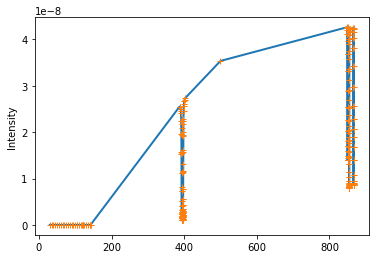

In [27]:
# A plot of the whole spectrum:

fig, figsize = (9,5)
plt.plot(waves,falc.rays[0].I,linewidth=2.0)
plt.plot(waves,falc.rays[0].I,'+',linewidth=10)

plt.ylabel("Intensity")



$\bf Note:$ From the plot you can see which spectral lines were calculated

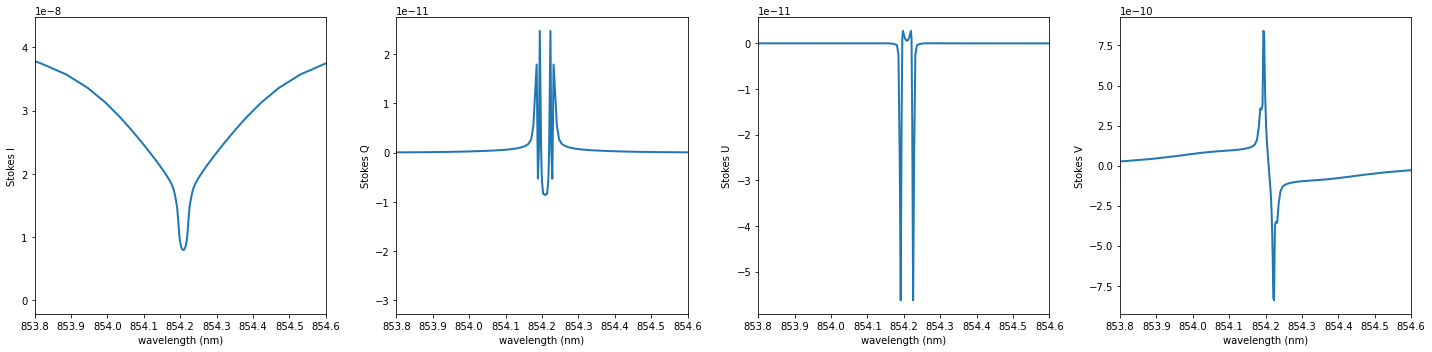

In [28]:
# Now let'slook at the lines.
# Let's start with the most useful line of all, CaII 854.2 nm

fig, ax = plt.subplots(1,4, figsize = (20, 5))
I=falc.rays[0].I
Q=falc.rays[0].Q
U=falc.rays[0].U
V=falc.rays[0].V
ax[0].plot( waves,I,linewidth=2.0)
ax[1].plot(waves,Q, linewidth=2.0)
ax[2].plot(waves, U, linewidth=2.0)
ax[3].plot(waves, V, linewidth=2.0)# in Gauss

for jj in range(4):
    ax[jj].set_xlabel('wavelength (nm)')   
    ax[jj].set_xlim(853.8,854.6)   # here you select the wavelength range

#ax[0].set_ylim(0,1./1.e10)

ax[0].set_ylabel('Stokes I')
ax[1].set_ylabel('Stokes Q')
ax[2].set_ylabel('Stokes U')
ax[3].set_ylabel('Stokes V')


plt.tight_layout()

$\bf Note:$ 1. The line is fairly broad, but only the core (below I ~ 2) is chromospheric; 2. We ran a model with an inclined magnetic field, so also Q and U are non-zero; 3. The amplitude of V is ~ 2% of the continuum intensity, but Q and U are an order of magnitude smaller. Let's take a look at the core:

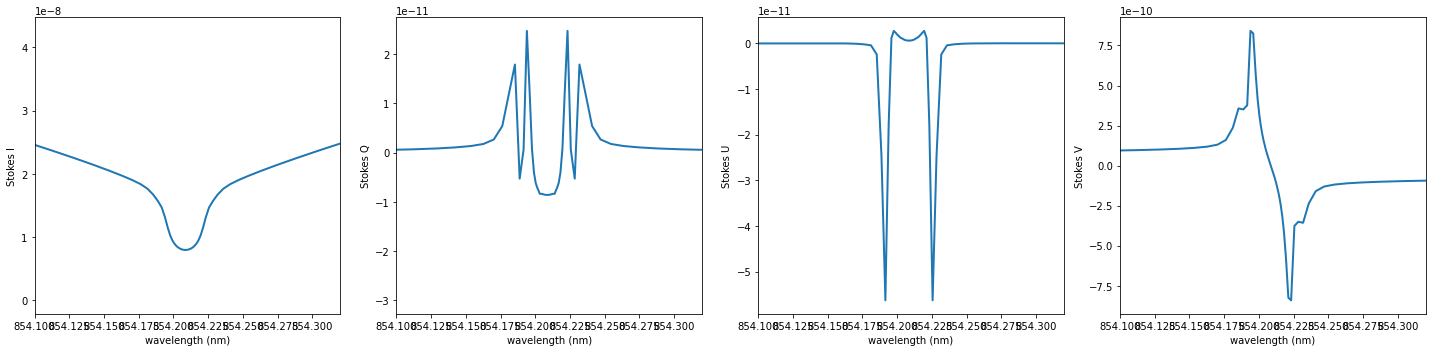

In [29]:
# 
# Let's zoom in on the line core:

fig, ax = plt.subplots(1,4, figsize = (20, 5))
I=falc.rays[0].I
Q=falc.rays[0].Q
U=falc.rays[0].U
V=falc.rays[0].V
ax[0].plot( waves,I,linewidth=2.0)
ax[1].plot(waves,Q, linewidth=2.0)
ax[2].plot(waves, U, linewidth=2.0)
ax[3].plot(waves, V, linewidth=2.0)# in Gauss

for jj in range(4):
    ax[jj].set_xlabel('wavelength (nm)')   
    ax[jj].set_xlim(854.1,854.32)   # here you select the wavelength range

#ax[0].set_ylim(0,1./1.e10)

ax[0].set_ylabel('Stokes I')
ax[1].set_ylabel('Stokes Q')
ax[2].set_ylabel('Stokes U')
ax[3].set_ylabel('Stokes V')


plt.tight_layout()

Many details ! Now you could repeat the exercise with other lines: CaII K = 393.3 nm; CaII H = 396.8 nm; CaII infrared triplet = 849.8, 854.2 (the one we just did) and 866.2 nm 

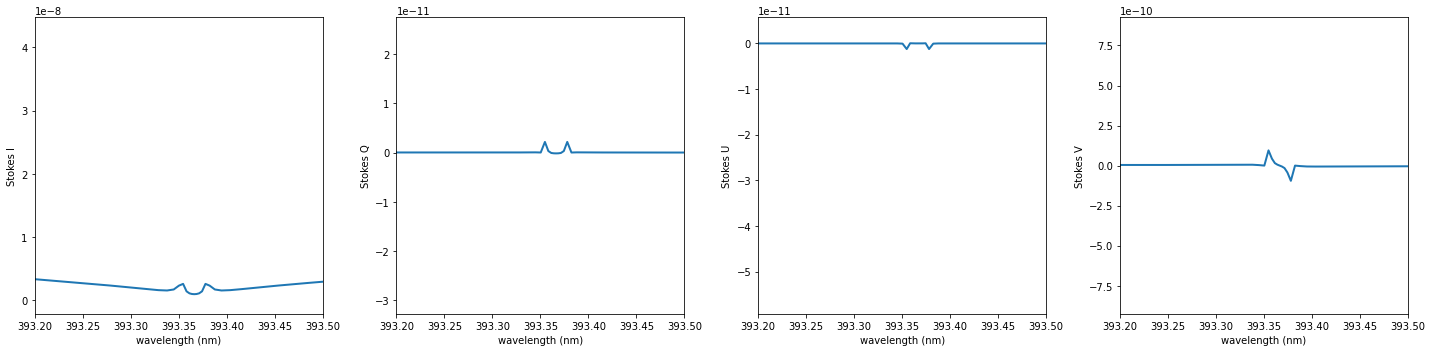

In [30]:
# For example, let's look at CaII K

fig, ax = plt.subplots(1,4, figsize = (20, 5))
I=falc.rays[0].I
Q=falc.rays[0].Q
U=falc.rays[0].U
V=falc.rays[0].V
ax[0].plot( waves,I,linewidth=2.0)
ax[1].plot(waves,Q, linewidth=2.0)
ax[2].plot(waves, U, linewidth=2.0)
ax[3].plot(waves, V, linewidth=2.0)# in Gauss

for jj in range(4):
    ax[jj].set_xlabel('wavelength (nm)')   
    ax[jj].set_xlim(393.2,393.5)   # here you select the wavelength range

#ax[0].set_ylim(0,1./1.e10)

ax[0].set_ylabel('Stokes I')
ax[1].set_ylabel('Stokes Q')
ax[2].set_ylabel('Stokes U')
ax[3].set_ylabel('Stokes V')


plt.tight_layout()


$\bf Note:$  While the amplitude of the Stokes parameters, in %, is similar to that of CaII 854.2, the absolute intensity is almost 1 order of magnitude less !